C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


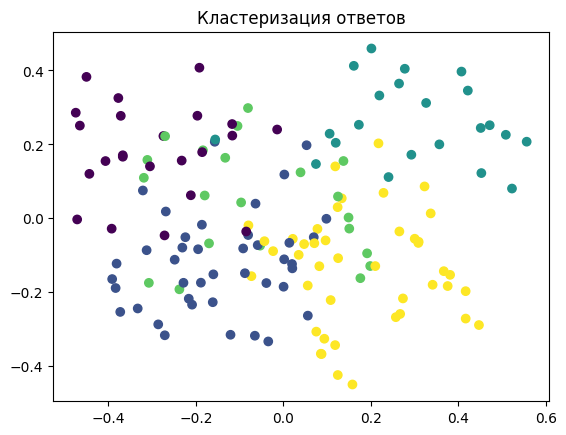

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузите ваш датасет
df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')

# Объедините ответы в одну строку для каждой записи
responses = df.apply(lambda row: ' '.join([str(row[col]) for col in df.columns[3:]]), axis=1)

# Векторизация текста с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(responses)

# Кластеризация методом k-средних
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Добавление меток кластеров в датасет
df['Cluster'] = kmeans.labels_

# Уменьшение размерности для визуализации (PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())
df[['PCA1', 'PCA2']] = reduced_features

# Визуализация кластеров
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('Кластеризация ответов')
plt.show()
